In [1]:
!pwd

/home/studio-lab-user/CESAR-NN/CESAR-NN-HumanExpressions/src


In [2]:
!git clone https://github.com/ultralytics/yolov5 || (echo "Already Cloned") # clone repo

fatal: destination path 'yolov5' already exists and is not an empty directory.
Already Cloned


In [3]:
%cd yolov5

/home/studio-lab-user/CESAR-NN/CESAR-NN-HumanExpressions/src/yolov5


In [4]:
import torch
import os
from roboflow import Roboflow
import glob
from IPython.display import Image, clear_output, display  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.13.0+cu117 (Tesla T4)


In [5]:
rf = Roboflow(api_key="1hSFiKcDyHf3ARKBlFSc")
project = rf.workspace("cesarnnhumanexpressions").project("nnhumanexpressions")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to NNHumanExpressions-3 in yolov5pytorch:: 100%|██████████| 1374/1374 [00:00<00:00, 6974.20it/s]


In [ ]:
!python train.py \
--img 640 --batch 10 --epochs 1000 \
--data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/home/studio-lab-user/CESAR-NN/CESAR-NN-HumanExpressions/src/yolov5/NNHumanExpressions-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 20 (delta 12), reused 17 (delta 9), pack-reused 0
Unpacking objects: 100% (20/20), 10.55 KiB | 1.51 MiB/s, done.
From https://github.com/ultralytics/yolov5
   91bad90..c25f3f4  

In [8]:
!python detect.py --weights runs/train/exp6/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp6/weights/best.pt'], source=/home/studio-lab-user/CESAR-NN/CESAR-NN-HumanExpressions/src/yolov5/NNHumanExpressions-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.9.13 torch-1.13.0+cu117 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /home/studio-lab-user/CESAR-NN/CESAR-NN-HumanExpressions/src/yolov5/NNHumanExpressions-3/test/images/angry015_jpeg.rf.3f56ccba51e67746a07b5d28723ddc80.jpg: 640x640 1 angry, 12.6ms
image 2/20 /home/studio-lab-user/CESAR-NN/CESAR-NN-HumanExpressions/src/yo

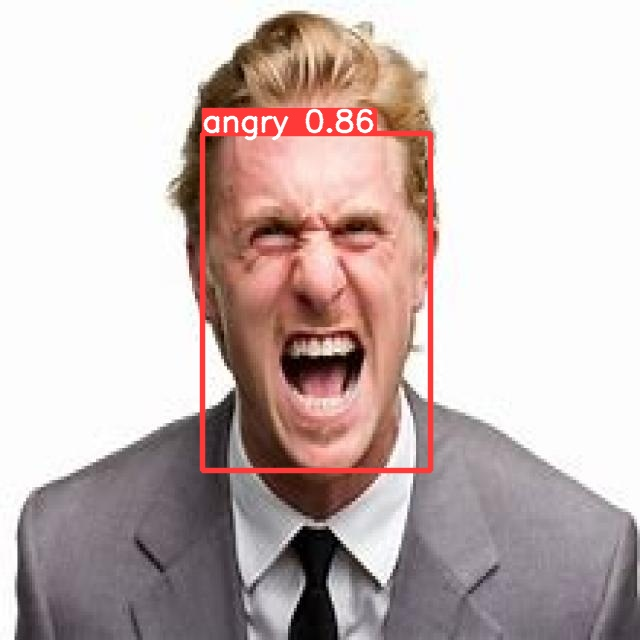

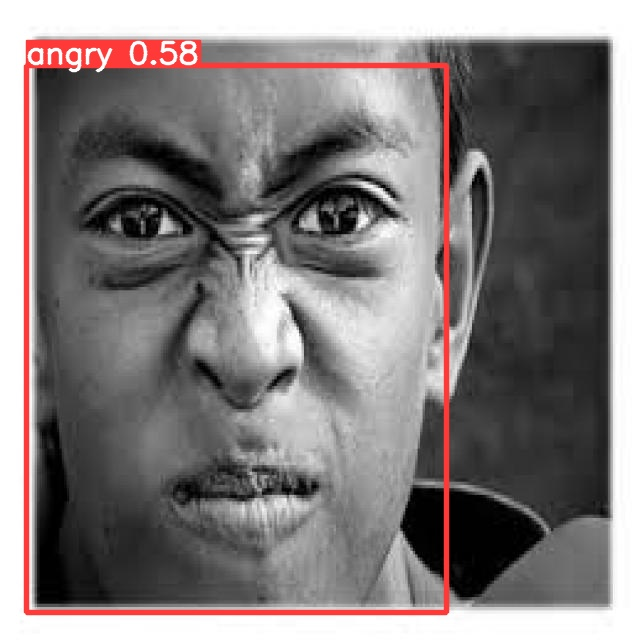

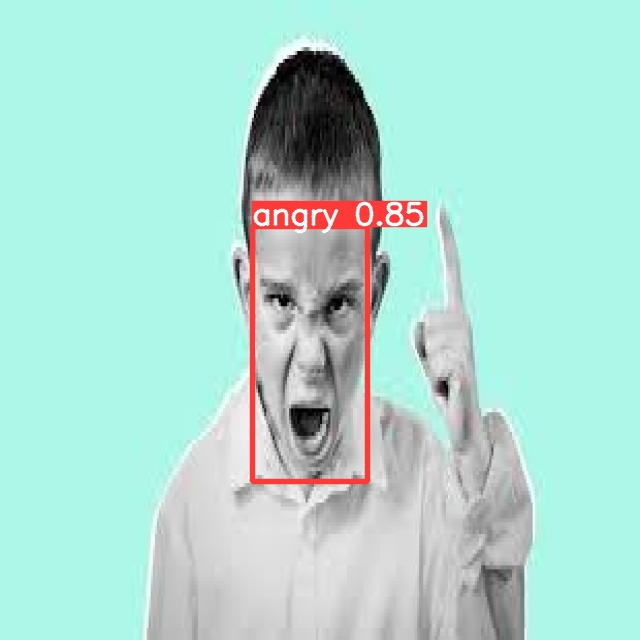

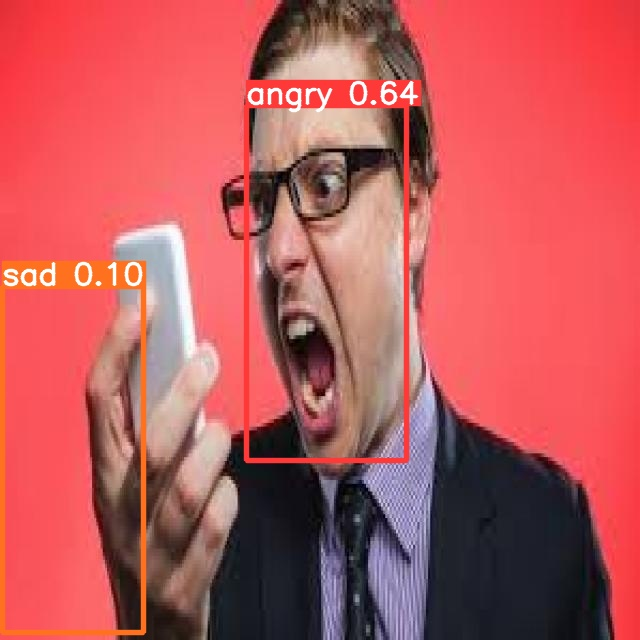

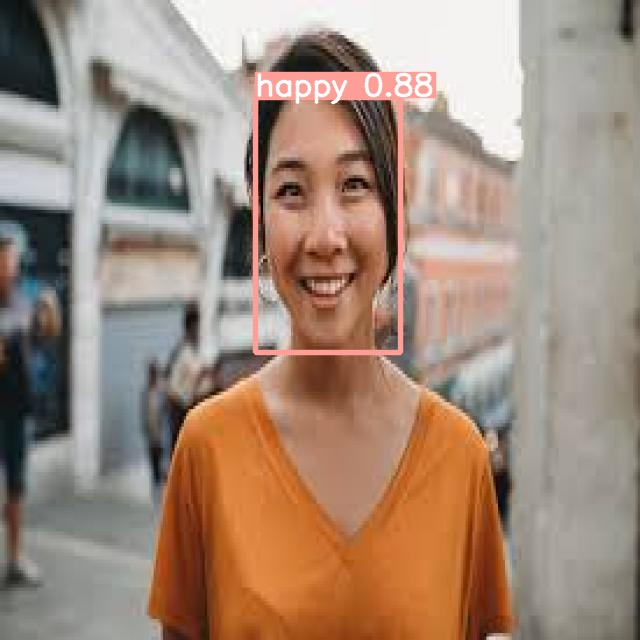

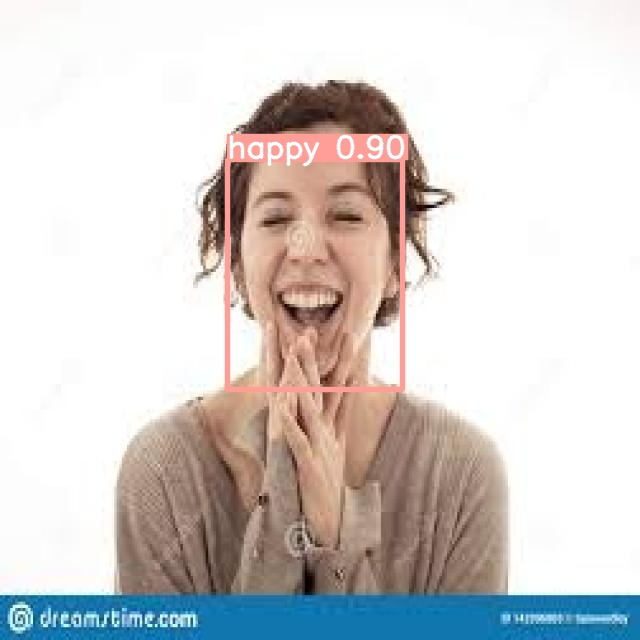

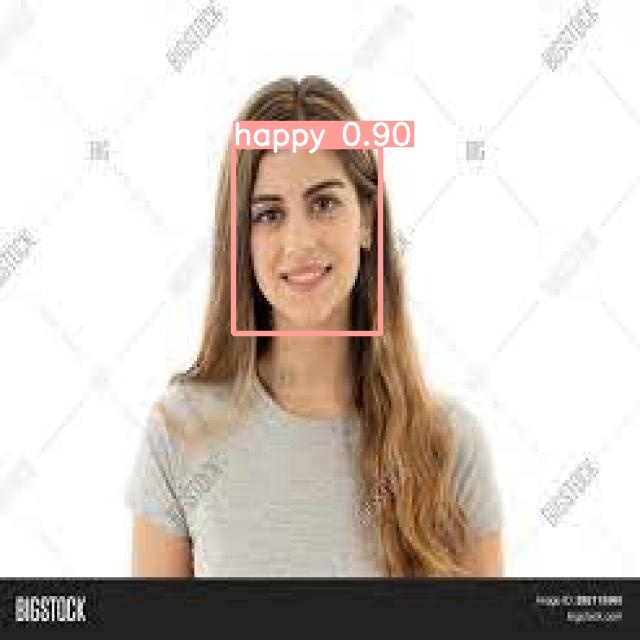

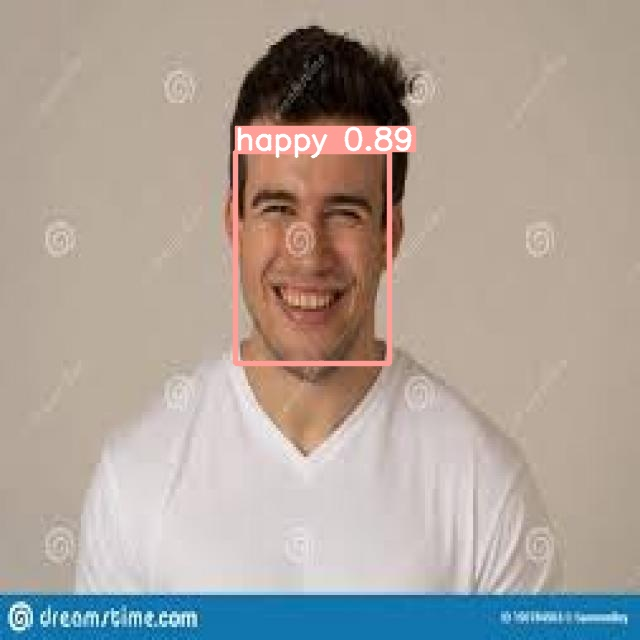

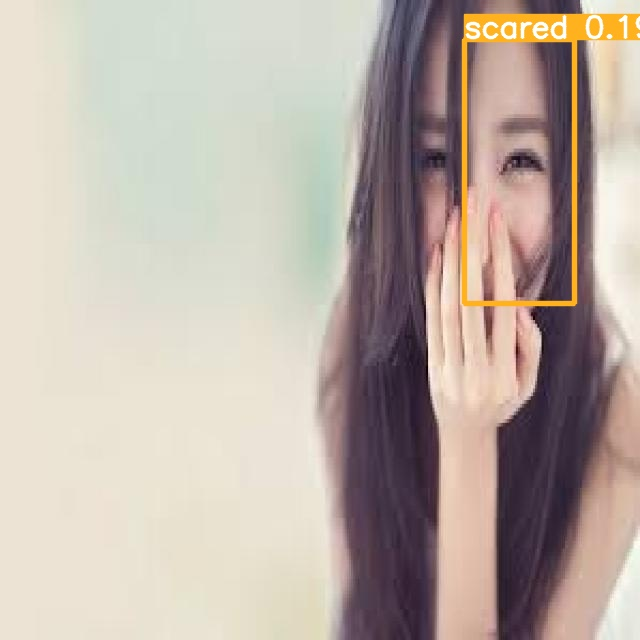

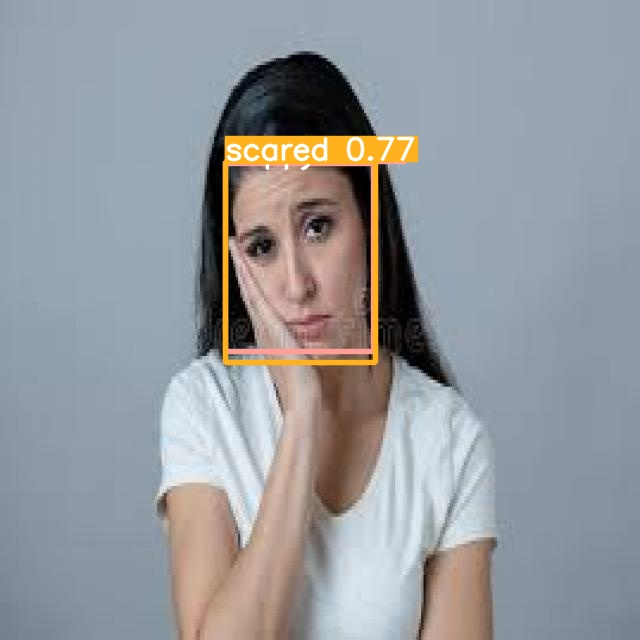

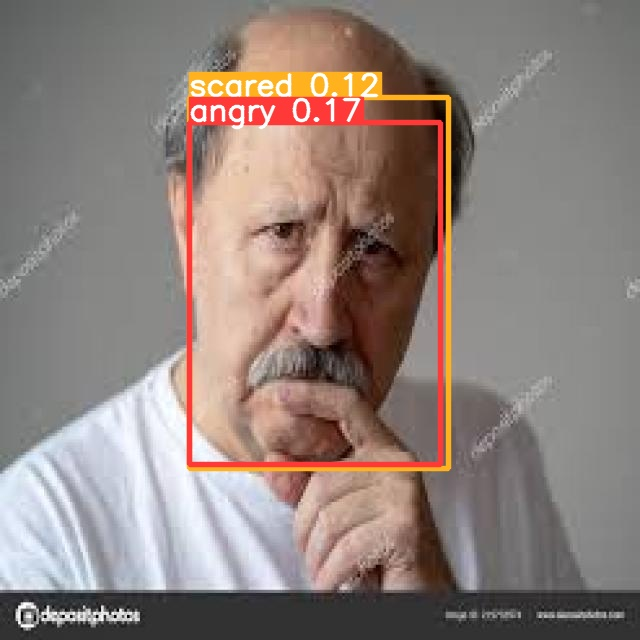

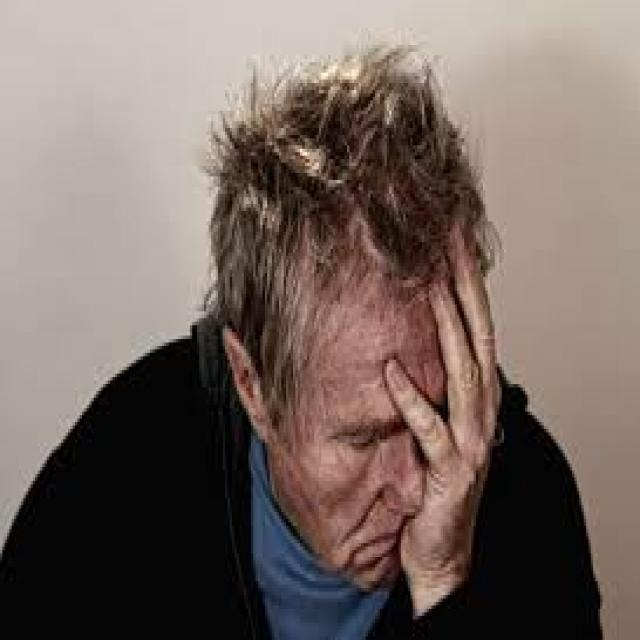

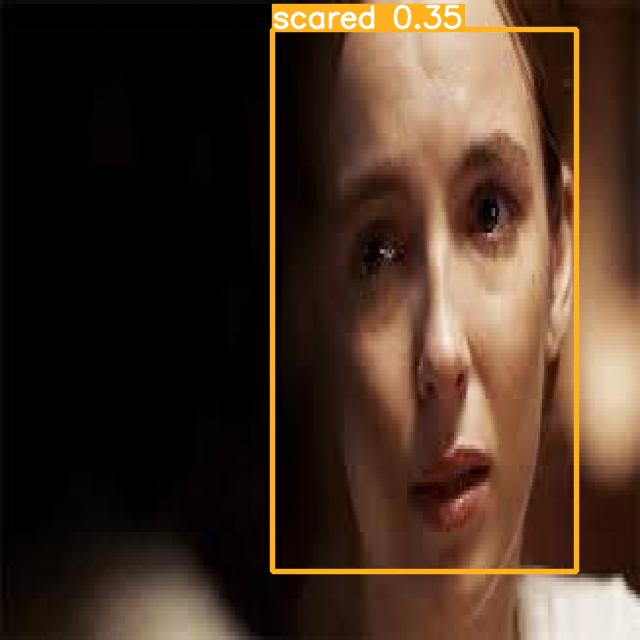

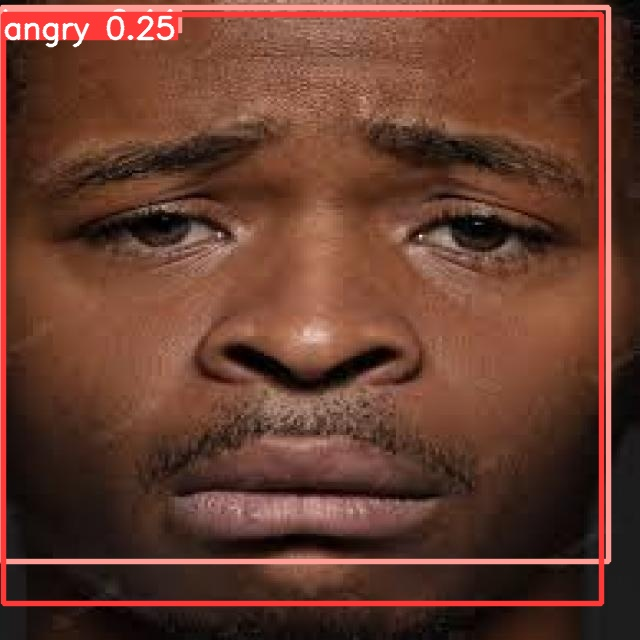

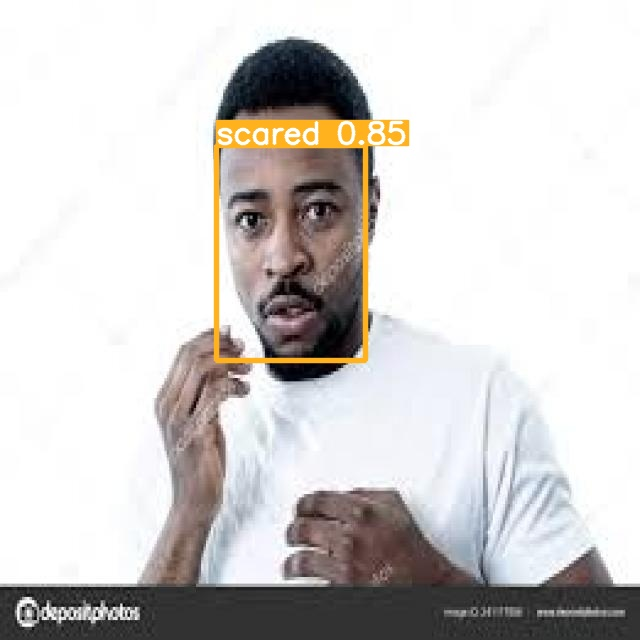

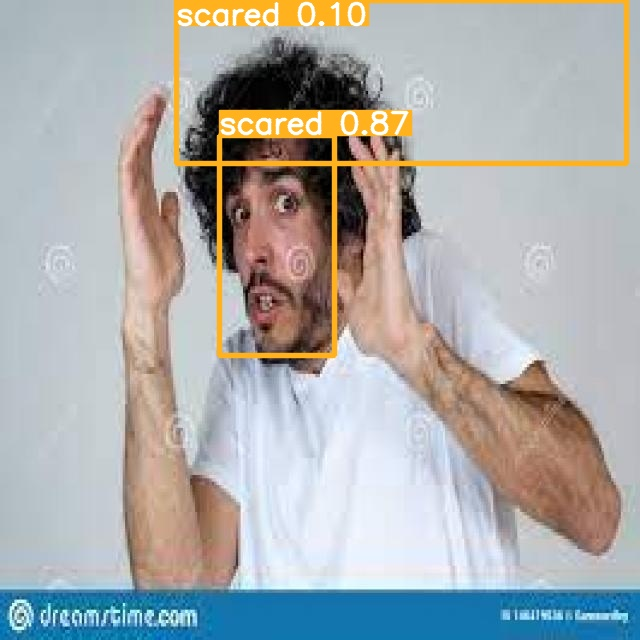

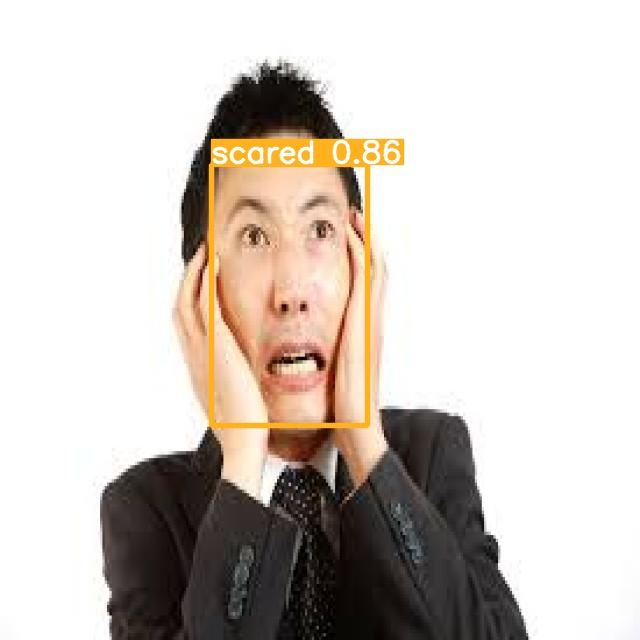

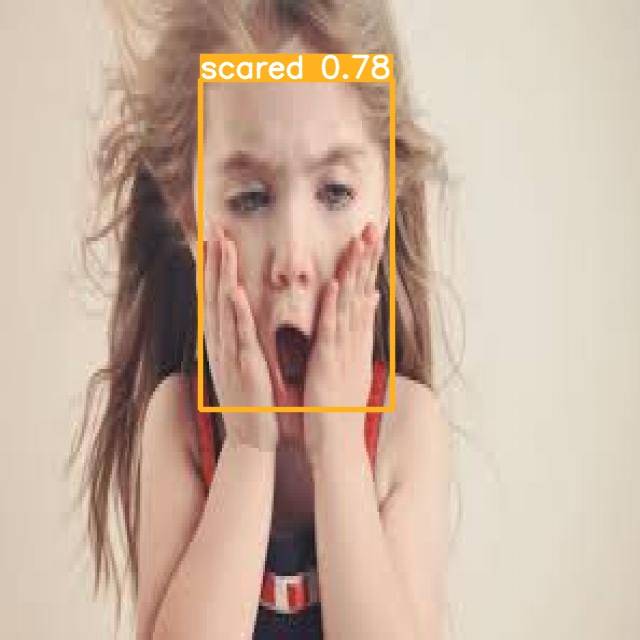

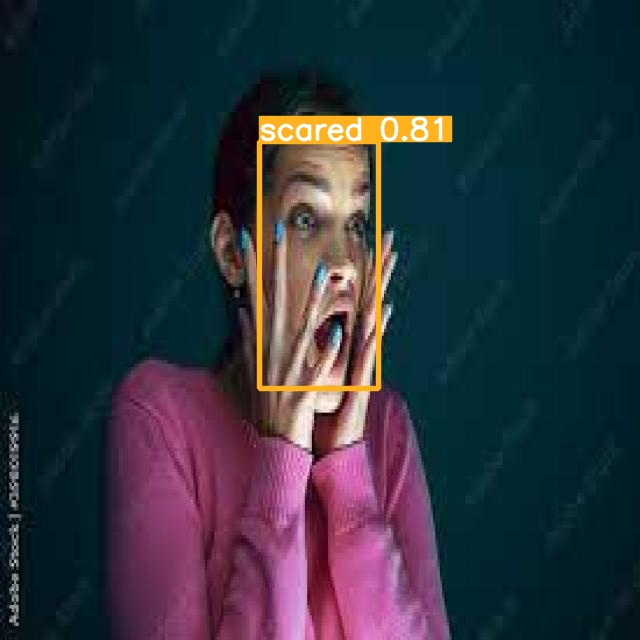

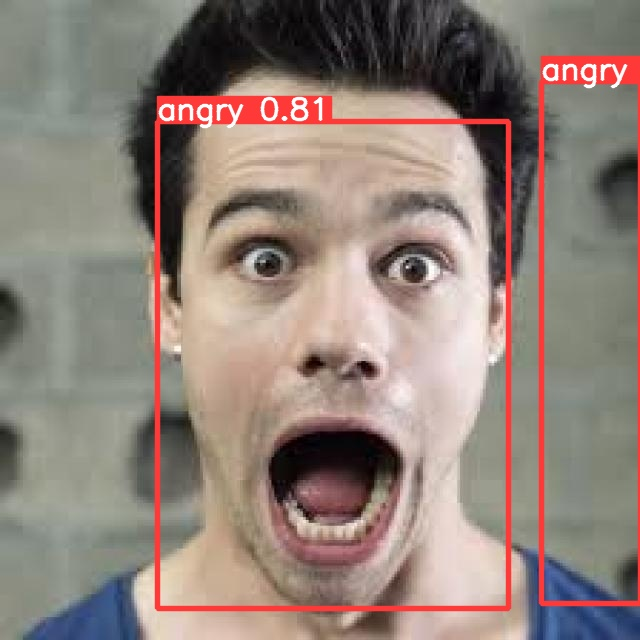

In [9]:
for imageName in glob.glob('./runs/detect/exp6/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#!python val.py --weights runs/train/exp/weights/best.pt --data ../datasets/$DATASET_NAME